# Chapter 13 Exercises

## Exercise 13.1
Write a program that reads a file, breaks each line into words, strips whitespace and
punctuation from the words, and converts them to lowercase.


In [2]:
import string

fin = open('test.txt')

l = []

for line in fin:
    line = line.replace('-', ' ')
    t = (line.lower()).strip()
    t2 = t.strip(string.punctuation)
    translator = str.maketrans('', '', string.punctuation)
    t3 = t2.translate(translator)
    l.append(t3.split())
    print(l)
    print(line)
    
fin.close()

[['hi', 'there']]
Hi there!   

[['hi', 'there'], ['how', 'are', 'you', 'doing', 'today']]
How are you doing today?

[['hi', 'there'], ['how', 'are', 'you', 'doing', 'today'], ['this', 'is', 'a', 'test', 'file']]
This is a test file.

[['hi', 'there'], ['how', 'are', 'you', 'doing', 'today'], ['this', 'is', 'a', 'test', 'file'], ['some', 'things', 'are', 'upper', 'case', 'and', 'there', 'is', 'all', 'different', 'kinds', 'of', 'punctuation', 'things', 'like', '5', '2']]
Some THINGS are upper case and there is all (different) kinds of punctuation & things: like 5 > 2.


## Exercise 13.2
Go to Project Gutenberg (http: // gutenberg. org ) and download your favorite
out-of-copyright book in plain text format.
Modify your program from the previous exercise to read the book you downloaded, skip over the
header information at the beginning of the file, and process the rest of the words as before.
Then modify the program to count the total number of words in the book, and the number of times
each word is used.
Print the number of different words used in the book. Compare different books by different authors,
written in different eras. Which author uses the most extensive vocabulary?

In [121]:
fin = open('sherlock.txt')

l = []
words = dict()

for i in range(61):
    next(fin)

for line in fin:
    line = line.replace('-', ' ')
    t = (line.lower()).strip()
    t2 = t.strip(string.punctuation)
    translator = str.maketrans('', '', string.punctuation)
    t3 = t2.translate(translator)
    listwords = t3.split()
    l.append(listwords)
    
    for word in listwords:
        if word in words:
            words[word] += 1
        else:
            words[word] = 1
    
# print(words) 
# uncomment the above to see a dictionary of all the words and amount of usage of each word
# in Sir Author Conan Doyle's "THE ADVENTURES OF SHERLOCK HOLMES"

print(len(words)) # number of unique words
print(sum(words.values())) # number of total words
fin.close()

8286
108317


## Exercise 13.3
Modify the program from the previous exercise to print the 20 most frequently used
words in the book.


In [76]:
most_to_least = list(reversed(sorted(words, key=words.get)))

for i in range(20):
    print(most_to_least[i])

the
and
i
of
to
a
in
that
it
you
he
was
his
is
my
have
with
as
had
at


## Exercise 13.4
Modify the previous program to read a word list (see Section 9.1) and then print all
the words in the book that are not in the word list. How many of them are typos? How many of
them are common words that should be in the word list, and how many of them are really obscure?

In [80]:
fin = open('words.txt')
dic = dict()

for line in fin:
    dic[line.strip()] = line
    
fin.close()

for word in most_to_least:
    if word not in dic:
        # print(word) uncomment to see output
        None
        
# some suprising finds, such as Christmas, many different names, days of the week are all not in the word list

## Exercise 13.5
Write a function named choose_from_hist that takes a histogram as defined in
Section 11.2 and returns a random value from the histogram, chosen with probability in proportion
to frequency. For example, for this histogram:

t = ['a', 'a', 'b']
hist = histogram(t)
hist
{'a': 2, 'b': 1}
your function should return 'a' with probability 2/3 and 'b' with probability 1/3.


In [19]:
def histogram(s):
    d = dict()
    for c in s:
        if c not in d:
            d[c] = 1
        else:
            d[c] += 1
    return d

t = ['a', 'a', 'b','a','a','c','b']
hist = histogram(t)
print(hist)

{'a': 4, 'b': 2, 'c': 1}


In [118]:
import random

def choose_from_hist(hist):
    summation = 0
    prob = []
    
    for key, val in hist.items():
        summation += val
        for i in range(val):
            prob.append(key)
        
    randy = random.randint(1,summation)
        
    return prob[randy-1]
    
for i in range(20):
    print(choose_from_hist(hist))


a
a
a
c
a
a
b
c
a
b
a
a
a
a
b
a
a
b
a
a


## Exercise 13.6
Python provides a data structure called set that provides many common set
operations. You can read about them in Section 19.5, or read the documentation at http:
// docs. python. org/ 3/ library/ stdtypes. html# types-set .
Write a program that uses set subtraction to find words in the book that are not in the word list.


In [8]:
# From author
def process_file(filename):
    hist = dict()
    fp = open(filename)
    for line in fp:
        process_line(line, hist)
        
    return hist

def process_line(line, hist):
    line = line.replace('-', ' ')
    
    for word in line.split():
        word = word.strip(string.punctuation + string.whitespace)
        word = word.lower()
        hist[word] = hist.get(word, 0) + 1
        
hist = process_file('emma.txt')
words = process_file('words.txt')

def subtract(d1, d2):
    res = dict()
    for key in d1:
        if key not in d2:
            res[key] = None
    return res

diff = subtract(hist, words)

print("Words in the book that aren't in the word list: (change code to see)")
for word in diff:
    # print(word, end=' ') uncomment me to see output
    None


Words in the book that aren't in the word list: (change code to see)


In [22]:
# My code
def subtract_with_sets(d1,d2):
    s1 = set(d1)
    s2 = set(d2)
    return s1 - s2

diff2 = subtract_with_sets(hist, words)

print("Words in the book that aren't in the word list: (change code to see)")
for word in diff2:
    # print(word, end=' ') uncomment me to see output
    None

Words in the book that aren't in the word list: (change code to see)


## Exercise 13.7
Write a program that uses this algorithm to choose a random word from the book.

1. Use keys to get a list of the words in the book.
2. Build a list that contains the cumulative sum of the word frequencies (see Exercise
10.2). The last item in this list is the total number of words in the book, n.
3. Choose a random number from 1 to n. Use a bisection search (See Exercise 10.10) to
find the index where the random number would be inserted in the cumulative sum.
4. Use the index to find the corresponding word in the word list.

In [24]:
import bisect

# My code
def csum(t):
    new = []
    for i in range(len(t)):
        new.append(sum(t[:i+1])) 
    return new

def get_random_word(hist):
    wordsInBook = []
    for key in hist:
        wordsInBook.append(key)

    tmp = []
    for val in hist.values():
        tmp.append(val)

    freqs = csum(tmp)

    randyReturns = random.randint(1,freqs[len(freqs)-1])

    index = bisect.bisect(freqs, randyReturns)

    return wordsInBook[index]

print(get_random_word(hist))
print(get_random_word(hist))
print(get_random_word(hist))

she
one
should


## Exercise 13.8
Markov analysis:
1. Write a program to read a text from a file and perform Markov analysis. The result should be
a dictionary that maps from prefixes to a collection of possible suffixes. The collection might
be a list, tuple, or dictionary; it is up to you to make an appropriate choice. You can test your
program with prefix length two, but you should write the program in a way that makes it easy
to try other lengths.
2. Add a function to the previous program to generate random text based on the Markov analysis.
Here is an example from Emma with prefix length 2:
He was very clever, be it sweetness or be angry, ashamed or only amused, at such
a stroke. She had never thought of Hannah till you were never meant for me?" "I
cannot make speeches, Emma:" he soon cut it all himself.
For this example, I left the punctuation attached to the words. The result is almost syntactically
correct, but not quite. Semantically, it almost makes sense, but not quite.
What happens if you increase the prefix length? Does the random text make more sense?
3. Once your program is working, you might want to try a mash-up: if you combine text from
two or more books, the random text you generate will blend the vocabulary and phrases from
the sources in interesting ways.


In [6]:
import string
import random

def get_prefixes(filename):
    d = dict()
    fp = open(filename)
    
    for i in range(255):
        next(fp)
        
    #print(next(fp))
        
    for line in fp:
        process_line(line, d)
        
    return d

def process_line(line, d):
    prefix_length = 2
    
    line = line.replace('-', ' ')
    tup = tuple()
    tmp = []
    for word in line.split():
        word = word.strip(string.whitespace) #+ string.punctuation)
        #word = word.lower()
        tmp.append(word)
        if len(tmp) == prefix_length+1:
            tup = tuple(tmp[0:prefix_length])
            thing = d.get(tup, [])
            thing.append(tmp[prefix_length])
            d[tup] = thing
            tmp = []

prefixes = get_prefixes("emma.txt") # maps from prefixes of length two to possible suffixes
#print(prefixes)

def get_random_text(prefixes, num):
    l = []
    randprefix = random.choice(list(prefixes.keys()))
    randsuffix = random.choice(prefixes[randprefix])
    
    l.append(randprefix)
    l.append(randsuffix)
    
    for i in range(num):
        randprefix = tuple([randprefix[1], randsuffix])
        if randprefix not in prefixes:
            randprefix = random.choice(list(prefixes.keys()))
        randsuffix = random.choice(prefixes[randprefix])
        l.append(randsuffix)
    
    str1 = list(l[0])
    str2 = " ".join(str1)
    
    str3 = l[1:]
    str4 = " ".join(str3)
    
    return str2 + ' ' + str4

print(get_random_text(prefixes, 100))

communicating his plans dozen indeed; earlier, Emma, and help leaning could might not have gratified welcome. to him, and said he very often indeed to the world if he had never been able to refrain from making the house in of not forget to think she must proceed any thing like it, you Mrs. Weston's to charity not venture minute of "we set no understand in face of. mean (nodding be seriously door) must many and were sure go to allay "Men's dance begun proved and me, company have her very much. Decidedly, honoured. on has ever money generally I had not shaken


## Exercise 13.9
The “rank” of a word is its position in a list of words sorted by frequency: the most
common word has rank 1, the second most common has rank 2, etc.
Zipf’s law describes a relationship between the ranks and frequencies of words in natural languages
(http: // en. wikipedia. org/ wiki/ Zipf's_ law ). Specifically, it predicts that the frequency,
f , of the word with rank r is:
f = cr−s
where s and c are parameters that depend on the language and the text. If you take the logarithm of
both sides of this equation, you get:
log f = log c − slog r
So if you plot log f versus log r, you should get a straight line with slope −s and intercept log c.
Write a program that reads a text from a file, counts word frequencies, and prints one line for each
word, in descending order of frequency, with log f and log r. Use the graphing program of your
choice to plot the results and check whether they form a straight line. Can you estimate the value of
s?


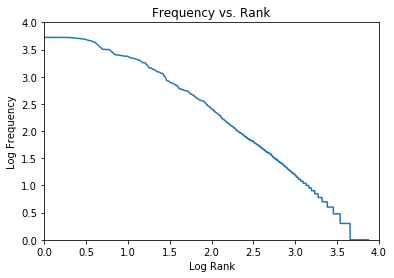

In [33]:
import matplotlib.pyplot as plt
import math

def logify(t):
    tmp = []
    for i in range(len(t)):
        tmp.append([math.log10(t[i][0]), math.log10(i+1)])
        
    return tmp

# Method is from author
def most_common(hist):
    t = []
    for key, value in hist.items():
        t.append((value, key))
        
    t.sort(reverse=True)
    return t

t = most_common(hist) # hist refers to histogram for emma.txt
logt = logify(t)
x = []
y = []

for val in logt:
    y.append(val[0])
    x.append(val[1])

plt.plot(x,y)
plt.axis([0, 4, 0, 4])
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Frequency vs. Rank')
plt.show()
plt.clf()